In [42]:
import os
import time
import json
import pprint
import requests
import http.client
import numpy as np
import pandas as pd
from datetime import date

# other key: '4a7c726a01msh4ca1a1226e51296p1eda4cjsn11e2cc965850'. -- still avail?
#322d8225bfmsh27bf206ed5a9ac1p16fceejsn20980c1afc0 xxb
# fcceabeb9amshbf564b56f3106afp1ed137jsn86bb664919c2 xx

# zillow_api_key = '9202cb6d35msh267f818513d4c85p1364fdjsn3cbef17f0867'
# zillow_api_key = '77b988d7b0mshe29695b4b1b70e4p143e3cjsnf8aebb0e1e9d'
# zillow_api_key = 'fcceabeb9amshbf564b56f3106afp1ed137jsn86bb664919c2'
#zillow_api_key = '322d8225bfmsh27bf206ed5a9ac1p16fceejsn20980c1afc0b'
zillow_api_key = 'e2168eb707msh4b307843c2da548p17279ejsn291624712ef8'

url = 'https://zillow56.p.rapidapi.com/search'
querystring = {"location":"south boston, boston, ma"}
headers = {'X-RapidAPI-Key': zillow_api_key, 'X-RapidAPI-Host': 'zillow56.p.rapidapi.com'}

In [40]:
# I didn't pay for access to any Zillow APIs, funny story, if you search github code repos its pretty easy to find clear text API keys...

In [61]:
dct = json.loads(data)
list(dct.keys())
# attributionInfo, nothing useful
# bathrooms, bedrooms, homeType, brokerageName, description, favoriteCount(resets on sale?)
# foreclosureTypes.get('isAnyForeclosue, False), hasPublicVideo
# Collections seems to include comps?
# isXXX values?
# lastSoldPrice This is actually the current sale price for recentlySold home status instances
# ListingAgent = dct.get('listedBy')[0].get('elements')[0].get('text') - Handle list idx values
# dct.get('listedBy')[0].get('elements')[0].get('text')
# listingMetadata a collection of binary listing flags, may add value?
# dct.get('listingMetadata')

['abbreviatedAddress',
 'address',
 'apartmentsForRentInZipcodeSearchUrl',
 'attributionInfo',
 'bathrooms',
 'bedrooms',
 'boroughId',
 'boroughSearchUrl',
 'brokerId',
 'brokerIdDimension',
 'brokerageName',
 'building',
 'buildingId',
 'buyAbilityData',
 'city',
 'cityId',
 'citySearchUrl',
 'collections',
 'comingSoonOnMarketDate',
 'communityUrl',
 'contingentListingType',
 'country',
 'county',
 'countyFIPS',
 'countyId',
 'countySearchUrl',
 'currency',
 'datePostedString',
 'daysOnZillow',
 'description',
 'desktopWebHdpImageLink',
 'downPaymentAssistance',
 'editPropertyHistorylink',
 'favoriteCount',
 'featuredListingTypeDimension',
 'foreclosingBank',
 'foreclosureAmount',
 'foreclosureAuctionCity',
 'foreclosureAuctionDescription',
 'foreclosureAuctionFilingDate',
 'foreclosureAuctionLocation',
 'foreclosureAuctionTime',
 'foreclosureBalanceReportingDate',
 'foreclosureDate',
 'foreclosureDefaultDescription',
 'foreclosureDefaultFilingDate',
 'foreclosureJudicialType',
 'fo

In [ ]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image

# Load the images from the URLs
image_url = 'https://photos.zillowstatic.com/fp/31530b121f852526b9b5918a658abb7e-uncropped_scaled_within_1536_1152.jpg'
response = requests.get(image_url)
image_data = BytesIO(response.content)
img = Image.open(image_data).convert('RGB')

import torch
import torchvision.models as models
import torchvision.transforms as T
# Use a pretrained convolutional neural network (CNN) - Resnet
# Remove the final classification layer and keep the feature embeddings (a vector representation of the image).
# These embeddings capture visual features like:
# * Condo style (modern vs. outdated)
# * Lighting, photo quality
# * Presence of renovations or luxury finishes

# Load pretrained ResNet
resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()  # remove final classification layer
resnet.eval()

# Image preprocessing
# TODO: If I'm resizing here should I not load the smallest available image first?
transform = T.Compose([T.Resize((224,224)), T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])])

x = transform(img).unsqueeze(0)  # add batch dim
with torch.no_grad():
    emb = resnet(x).squeeze().numpy()

# 512 features per image
pd.DataFrame(emb)



/Users/jking/miniforge3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jking/miniforge3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,0
0,0.569427
1,0.260273
2,1.177939
3,0.691785
4,0.285980
...,...
507,0.807964
508,0.745264
509,1.947666
510,0.130495


In [11]:
vicksburg_zpid = 448689951
import pprint
import http.client
conn = http.client.HTTPSConnection("zillow56.p.rapidapi.com")
headers = {'X-RapidAPI-Key': zillow_api_key,  'x-rapidapi-host': "zillow56.p.rapidapi.com" }
conn.request('GET', f'/propertyV2?zpid={vicksburg_zpid}', headers=headers)
res = conn.getresponse()
data = res.read()
pprint.pprint(data.decode('utf-8'))

('{"abbreviatedAddress":"7 Vicksburg St '
 '#7","address":{"city":"Boston","community":null,"neighborhood":null,"state":"MA","streetAddress":"7 '
 'Vicksburg St '
 '#7","subdivision":null,"zipcode":"02127"},"apartmentsForRentInZipcodeSearchUrl":{"path":"/boston-ma-02127/apartments/"},"attributionInfo":{"agentEmail":null,"agentLicenseNumber":null,"agentName":"Martha '
 'Toti","agentPhoneNumber":"413-883-6711","attributionTitle":null,"brokerName":"Coldwell '
 'Banker Realty - '
 'Boston","brokerPhoneNumber":"617-242-0025","buyerAgentMemberStateLicense":null,"buyerAgentName":"Hans '
 'Nagrath","buyerBrokerageName":"Compass","coAgentLicenseNumber":null,"coAgentName":"Amanda '
 'Werner","coAgentNumber":"978-790-0057","infoString10":"The property listing '
 'data and information set forth herein were provided to MLS Property '
 'Information Network, Inc. from third party sources, including sellers, '
 'lessors and public records, and were compiled by MLS Property Information '
 'Network, Inc

<h2>Collect Sold Info</h2>
<p>Collect recently sold property details and zpid values for the South Boston location</p>
<hr />

In [43]:
querystring = {"location":"south boston, boston, ma", 'page': 1, 'status': 'recentlySold'}
# querystring = {"location":"02127", 'page': 1, 'status': 'recentlySold'}
page = 1

response = requests.get(url, headers=headers, params=querystring).json()
data = response.get('results')
total_pages = response.get('totalPages', 1) 

while total_pages > page:
    # The API is silently rate-limited, sleep 10 seconds in between resquests to avoid collecting empty batches
    time.sleep(10)
    page += 1
    print(f'Requesting additional page: {page}')
    querystring['page'] = page
    response = requests.get(url, headers=headers, params=querystring).json()
    print(len(response.get('results', [])))
    data += response.get('results', [])

Requesting additional page: 2
41
Requesting additional page: 3
41
Requesting additional page: 4
41
Requesting additional page: 5
41
Requesting additional page: 6
41
Requesting additional page: 7
41
Requesting additional page: 8
41
Requesting additional page: 9
41
Requesting additional page: 10
41
Requesting additional page: 11
41
Requesting additional page: 12
41
Requesting additional page: 13
41
Requesting additional page: 14
41
Requesting additional page: 15
41
Requesting additional page: 16
41
Requesting additional page: 17
41
Requesting additional page: 18
41
Requesting additional page: 19
41
Requesting additional page: 20
41


In [23]:
def get_property_profile(zpid):

    conn = http.client.HTTPSConnection("zillow56.p.rapidapi.com")
    headers = {'X-RapidAPI-Key': zillow_api_key,  'x-rapidapi-host': "zillow56.p.rapidapi.com" }
    conn.request('GET', f'/propertyV2?zpid={zpid}', headers=headers)
    res = conn.getresponse()
    data = json.loads(res.read())
    fout = f'./data/property_profiles/{zpid}.json'
    with open(fout, 'w') as f:
        json.dump(data, f, indent=2)

vicksburg_zpid = 448689951
get_property_profile(zpid=vicksburg_zpid)

In [44]:
sold_df_new = pd.DataFrame(data)
# sold_df.dateSold = pd.to_datetime(sold_df.dateSold)
sold_df_new.dateSold = pd.to_datetime(sold_df_new.dateSold, unit='ms').dt.date
sold_df_new['ListingDate'] = np.NaN # init null ListingDate value
sold_df_new['url'] = sold_df_new.zpid.apply(lambda xs: f"http://www.zillow.com/homedetails/{xs}_zpid/")
# sold_df_new.head().T
# sold_df[sold_df.zpid == 448689951]

In [45]:
sold_df.list_sub_type

NameError: name 'sold_df' is not defined

In [26]:
######################
querystring = {"location":"south boston, boston, ma", 'page': 1}
page = 1

response = requests.get(url, headers=headers, params=querystring).json()
data = response.get('results')
total_pages = response.get('totalPages', 1) 

while total_pages > page:
    # The API is silently rate-limited, sleep 10 seconds in between resquests to avoid collecting empty batches
    time.sleep(10)
    page += 1
    print(f'Requesting additional page: {page}')
    querystring['page'] = page
    response = requests.get(url, headers=headers, params=querystring).json()
    print(len(response.get('results', [])))
    data += response.get('results', [])
    
listed_df = pd.DataFrame(data)

Requesting additional page: 2
41
Requesting additional page: 3
41
Requesting additional page: 4
41
Requesting additional page: 5
41
Requesting additional page: 6
19


In [28]:
all_zpids = list(set(sold_df_new.zpid.to_list() + listed_df.zpid.to_list()))

In [29]:
# Get all listing details
for zpid in all_zpids:
    get_property_profile(zpid=zpid)

In [37]:
if len(all_zpids) != len(os.listdir('./data/property_profiles')):
    print('Error, not all property profiles have been collected.')
else:
    print('Success: all property profiles have been collected.')

Success: all property profiles have been collected.


In [ ]:
sold_df.shape[0], sold_df_new.shape[0]

(328, 820)

In [159]:
combined = pd.concat([sold_df, sold_df_new[~sold_df_new.zpid.isin(sold_df.zpid)]])
combined

/var/folders/6y/1n9l1vl92m967mnxhq5x56_w0000gn/T/ipykernel_11234/1729740727.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined = pd.concat([sold_df, sold_df_new[~sold_df_new.zpid.isin(sold_df.zpid)]])


,bathrooms,bedrooms,city,country,currency,dateSold,daysOnZillow,homeStatus,homeStatusForHDP,homeType,...,priceChange,priceReduction,isRentalWithBasePrice,videoCount,ListingDate,ListingDate,DSO,rentalMarketingSubType,rentalR4RRoommateCount,url
0,2.0,2.0,Boston,USA,USD,2025-02-06 00:00:00,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,NaN,None,None,NaN,NaN,2025-01-21,0.0,NaN,NaN,NaN
1,3.0,6.0,Boston,USA,USD,2025-02-05 00:00:00,-1,RECENTLY_SOLD,RECENTLY_SOLD,MULTI_FAMILY,...,NaN,None,None,NaN,NaN,2024-09-23,0.0,NaN,NaN,NaN
2,4.0,4.0,South Boston,USA,USD,2025-01-31 00:00:00,-1,RECENTLY_SOLD,RECENTLY_SOLD,SINGLE_FAMILY,...,NaN,None,None,NaN,NaN,2024-07-07,0.0,NaN,NaN,NaN
3,2.0,2.0,South Boston,USA,USD,2025-01-31 00:00:00,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,-20000.0,"$20,000 (Dec 27)",None,NaN,NaN,2024-10-24,0.0,NaN,NaN,NaN
4,4.0,4.0,South Boston,USA,USD,2025-01-29 00:00:00,-1,RECENTLY_SOLD,RECENTLY_SOLD,SINGLE_FAMILY,...,NaN,None,None,NaN,NaN,2024-12-28,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,3.0,3.0,South Boston,USA,USD,2024-08-02,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,http://www.zillow.com/homedetails/123844743_zpid/
816,2.0,2.0,Boston,USA,USD,2024-08-02,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,http://www.zillow.com/homedetails/339518148_zpid/
817,3.0,3.0,Boston,USA,USD,2024-08-02,-1,RECENTLY_SOLD,RECENTLY_SOLD,TOWNHOUSE,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,http://www.zillow.com/homedetails/339616377_zpid/
818,1.0,3.0,Boston,USA,USD,2024-08-02,-1,RECENTLY_SOLD,RECENTLY_SOLD,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,http://www.zillow.com/homedetails/2075837787_z...


In [172]:
import os
if os.path.exists('sold_df.pq'):
    sold_df = pd.read_parquet('sold_df.pq')
    combined = pd.concat([
        sold_df.dropna(axis=1, how='all'),
        sold_df_new[~sold_df_new.zpid.isin(sold_df.zpid)].dropna(axis=1, how='all')
        ])
    combined['dateSold'] = pd.to_datetime(combined['dateSold'])
    combined.to_parquet('sold_df.pq')
else:
    sold_df_new.to_parquet('sold_df.pq')

In [174]:
# print(listed_df.shape[0], sold_df.shape[0])
# listed_df.to_parquet('listed_df.pq')
# sold_df.to_parquet('sold_df.pq')
listed_df = pd.read_parquet('listed_df.pq')
# sold_df = pd.read_parquet('sold_df.pq')
# sold_df = pd.read_parquet('sold_df_updated.pq')
sold_df = pd.read_parquet('sold_df.pq')
sold_df[sold_df.zpid == 448689951].T

,445
bathrooms,3.0
bedrooms,3.0
city,Boston
country,USA
currency,USD
dateSold,2025-03-21 00:00:00
daysOnZillow,-1
homeStatus,RECENTLY_SOLD
homeStatusForHDP,RECENTLY_SOLD
homeType,TOWNHOUSE


In [40]:
#########################################################################
# Modeling phase
from datetime import datetime

# WTF is this shit???!
# sold_df.dateSold.apply(lambda xs: datetime.fromtimestamp(xs / 1000))
# pd.to_datetime(sold_df.dateSold, unit='ms').dt.date

In [41]:
# sorted(sold_df.columns)
for c in sold_df.columns:
    if 'date' in c.lower():
        print(c)

dateSold
datePriceChanged
ListingDate 
ListingDate


In [42]:
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback
import re

######################FIND PROXIES#########################################
def get_proxies(require_ssl=False):
    url = 'https://free-proxy-list.net/'
    response = requests.get(url, timeout=5.0)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:299]:   #299 proxies max
        https = i.xpath('.//td[7]/text()')[0]
        if require_ssl:
            if https == 'no':
                continue
        proxy = ":".join([i.xpath('.//td[1]/text()')
        [0],i.xpath('.//td[2]/text()')[0]])
        proxies.add(proxy)
    return proxies

get_proxies(require_ssl=True)

{'109.135.16.145:8789',
 '116.203.139.209:5678',
 '14.235.71.53:8080',
 '140.82.22.235:34587',
 '15.235.132.252:8080',
 '152.53.194.55:13921',
 '154.201.75.170:8888',
 '154.236.177.102:1977',
 '162.238.123.152:8888',
 '162.243.149.86:31028',
 '176.126.103.194:44214',
 '179.61.251.217:8080',
 '179.96.28.58:80',
 '18.222.34.42:3128',
 '205.185.114.191:80',
 '212.175.61.30:8080',
 '213.35.105.30:8080',
 '222.252.194.29:8080',
 '223.135.156.183:8080',
 '27.254.99.183:8118',
 '45.144.234.129:53914',
 '45.166.93.113:999',
 '47.252.29.28:11222',
 '47.88.105.97:1080',
 '5.78.130.46:12016',
 '65.108.251.40:53535',
 '67.43.228.250:7015',
 '67.43.228.253:13271',
 '67.43.228.254:9105',
 '67.43.236.20:6231',
 '71.14.218.2:8080',
 '72.10.160.174:18223',
 '72.10.160.90:3581',
 '72.10.160.91:28459',
 '72.10.160.92:3709',
 '77.105.137.42:8080',
 '8.213.131.36:8080',
 '8.217.37.153:8080',
 '8.219.97.248:80',
 '8.220.200.221:8080',
 '8.220.223.66:8080'}

In [ ]:
import time
import os
import signal
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium_stealth import stealth
from webdriver_manager.chrome import ChromeDriverManager


def get_zillow_listing_date_selenium(zpid: str, driver: uc.Chrome=None):
    
    if not isinstance(driver, uc.Chrome):
        options = uc.ChromeOptions()
        options.headless = False  # Run in visible mode to troubleshoot
        # driver = uc.Chrome(version_main=135, options=options)
        driver = uc.Chrome(user_data_dir='profile', options=options) # User data dir forces a shared parent UC session
        driver.implicitly_wait(2)

    url = f"http://www.zillow.com/homedetails/{zpid}_zpid/"
    # url = 'https://www.whatismyip.com/my-ip-information/'
    
    try:
        print(url)
        driver.get(url)
        time.sleep(15)
        print(f'Page Title: {driver.title}')
    except Exception as e:
        print(f'URL Get Exception: {e}')
        return np.NaN

    # Try to find and click "Show more" if it exists
    try:
        show_more_button = WebDriverWait(driver, 2).until(
            # EC.presence_of_element_located((By.XPATH, "//button[span[normalize-space()='Show more']][preceding::table[1]]"))
            EC.presence_of_element_located((By.XPATH, "//button[span[normalize-space()='Show more']][preceding::td[span[@data-testid='date-info']]]"))
        )
        driver.execute_script("arguments[0].click();", show_more_button)  # Click via JavaScript to avoid interception issues
        print("Clicked 'Show more' button.")
    except:
        print("No 'Show more' button found. Proceeding...")
        
    try:
        show_more_button = WebDriverWait(driver, 2).until(
            EC.presence_of_element_located((By.XPATH, "//button[span[normalize-space()='Show more']][following::td[span[@data-testid='date-info']]]"))
        )
        driver.execute_script("arguments[0].click();", show_more_button)
        print("Clicked 'Show more' button 2.")
    except:
        print("No 'Show more' button 2 found. Proceeding...")

    
    # n_show_more = 1
    # while True:
    #     try:
    #         show_more_button = WebDriverWait(driver, 2).until(
    #             EC.presence_of_element_located((By.XPATH, "//button[span[normalize-space()='Show more']][following::table[1]]"))
    #         )
    #         driver.execute_script("arguments[0].click();", show_more_button)
    #         print(f"Clicked {n_show_more} 'Show more' button.")
    #         n_show_more += 1
    #     except:
    #         # Break the loop if no more "Show more" buttons are found
    #         print("No 'Show more' button found. Proceeding...")
    #         break

    try:
        
        listing_date_element = WebDriverWait(driver, 5).until(EC.presence_of_element_located(
            (By.XPATH, "//td[span[@data-testid='date-info']]/following-sibling::td[1]/span[normalize-space()='Listed for sale']/parent::td/preceding-sibling::td[1]/span")
            )
        )
        if not listing_date_element:
            print('Trying to find Listing Date round 2')
            listing_date_element = WebDriverWait(driver, 5).until(EC.presence_of_element_located(
                (By.XPATH, "//td[span[normalize-space()='Listed for sale']]/preceding-sibling::td[1]/span[@data-testid='date-info']")
            ))

        listing_date = listing_date_element.text if listing_date_element else "Not found"
        return listing_date
    except Exception as e:
        print(f'Round 1 Error: {e}')
        try:
            print('Trying to find Listing Date round 2')
            listing_date_element = WebDriverWait(driver, 5).until(EC.presence_of_element_located(
                (By.XPATH, "//td[span[normalize-space()='Listed for sale']]/preceding-sibling::td[1]/span[@data-testid='date-info']")
            ))

            listing_date = listing_date_element.text if listing_date_element else "Not found"
        except Exception as e:
            print(f'Round 2 Error: {e}')
            print('Listing date not found.')
            return np.NaN
            # return 'No Date'
    finally:
        # driver.close() # Close the current window
        # driver.quit() # Shuts down the entire driver process
        x = 1
        
    print(f'Found Lisiting Date: {listing_date}')

    # Clean up Chrome driver instances
    # driver.close() # Close the current window
    # driver.quit() # Shuts down the entire driver process
    # os.kill(driver.service.process.pid, signal.SIGTERM)

# Example usage
zpid = '2074308220'
zpid = '339517505'
zpid =  '339517505'
zpid = '59152217'
zpid = '339517505'

coverage =  sold_df[sold_df.ListingDate.notnull()].shape[0] / sold_df.shape[0]
print(f'Listings covered: {coverage:.2%}')
print('-'*80)

# Initial a single Chrome driver to be shared
options = uc.ChromeOptions()
options.headless = False  # Run in visible mode to troubleshoot
shared_driver = uc.Chrome(user_data_dir='profile', options=options) # User data dir forces a shared parent UC session
shared_driver.implicitly_wait(2)

# sold_df['ListingDate'] = np.NaN
# sold_df.loc[sold_df.ListingDate == 'Listing date not found.', 'ListingDate'] = np.NaN
for zpid in  sold_df[sold_df.ListingDate.isnull()].zpid.values:
# for zpid in sold_df[sold_df.ListingDate == sold_df.dateSold].zpid.values:
    listing_date = get_zillow_listing_date_selenium(zpid, driver=shared_driver)
    print(f'ZPID: {zpid} - Listing Date: {listing_date}')
    sold_df.loc[sold_df.zpid == int(zpid), 'ListingDate'] = listing_date
    sold_df.to_parquet('sold_df_updated.pq') # Refresh the data

# The driver could be in a failed state, in which case calling close will throw an exception
try:
    shared_driver.close()
except:
    pass
shared_driver.quit()
## print(sold_df[sold_df.ListingDate.notnull()])

Listings covered: 89.63%
--------------------------------------------------------------------------------
http://www.zillow.com/homedetails/441588495_zpid/
Page Title: 581 E Broadway #1, Boston, MA 02127 | Zillow
Clicked 'Show more' button.
Clicked 'Show more' button 2.
Round 1 Error: Message: 
Stacktrace:
0   undetected_chromedriver             0x0000000100a50028 undetected_chromedriver + 6361128
1   undetected_chromedriver             0x0000000100a4772a undetected_chromedriver + 6326058
2   undetected_chromedriver             0x00000001004a7c20 undetected_chromedriver + 429088
3   undetected_chromedriver             0x00000001004f9d1b undetected_chromedriver + 765211
4   undetected_chromedriver             0x00000001004f9fe1 undetected_chromedriver + 765921
5   undetected_chromedriver             0x0000000100549f44 undetected_chromedriver + 1093444
6   undetected_chromedriver             0x000000010051fe2d undetected_chromedriver + 921133
7   undetected_chromedriver             0x000

In [48]:
sold_df[sold_df.ListingDate == sold_df.dateSold].zpid.values.shape[0]

1

In [49]:
sold_df[sold_df.zpid == 339517505][['ListingDate', 'dateSold']]
# sold_df[sold_df.ListingDate == sold_df.dateSold]

,ListingDate,dateSold
0,2025-01-21,2025-02-06


In [51]:
coverage =  sold_df[sold_df.ListingDate.notnull()].shape[0] / sold_df.shape[0]
print(f'Listings covered: {coverage:.2%}')

Listings covered: 89.94%


In [52]:
sold_df[sold_df.zpid == 247150180].T

""
bathrooms
bedrooms
city
country
currency
dateSold
daysOnZillow
homeStatus
homeStatusForHDP
homeType


In [53]:
null_dts = sold_df[sold_df.ListingDate.isnull()].shape[0]
valid_dts = sold_df[sold_df.ListingDate.notnull()].shape[0]
print(f'Remaining NULL ListingDates: {null_dts} | Filled in ListingDates: {valid_dts} | % remaining {null_dts/(null_dts+valid_dts):.2%}')

Remaining NULL ListingDates: 33 | Filled in ListingDates: 295 | % remaining 10.06%


In [54]:
# sold_df.ListingDate.value_counts().sort_values()
# print('Listing date not found.')
# sold_df.loc[sold_df.ListingDate == 'No Date', 'ListingDate'] = np.NaN
sold_df.loc[sold_df.ListingDate == 'No Date']
# sold_df[sold_df.ListingDate.fillna('XX').str.len() > 8]

,bathrooms,bedrooms,city,country,currency,dateSold,daysOnZillow,homeStatus,homeStatusForHDP,homeType,...,lotAreaUnit,lotAreaValue,datePriceChanged,priceChange,priceReduction,isRentalWithBasePrice,videoCount,ListingDate,ListingDate,DSO


In [55]:
listed_df.to_parquet('listed_df_updated.pq')

In [59]:
# listed_df.to_parquet('listed_df_updated.pq')
# sold_df.to_parquet('sold_df_updated.pq')
import pandas as pd

# sold_df = pd.read_parquet('sold_df_updated.pq')
# Post processing
sold_df.ListingDate = pd.to_datetime(sold_df.ListingDate)
sold_df.dateSold = pd.to_datetime(sold_df.dateSold)
sold_df.datePriceChanged = pd.to_datetime(sold_df.datePriceChanged)
# sold_df.drop(columns=['ListingDate '], inplace=True)
sold_df['DSO'] = (sold_df.dateSold - sold_df.ListingDate).dt.days

In [60]:
sold_df[sold_df.DSO == 0][['zpid', 'ListingDate', 'dateSold', 'DSO']]

,zpid,ListingDate,dateSold,DSO
126,59150899,2024-08-28,2024-08-28,0.0


<Axes: ylabel='Frequency'>

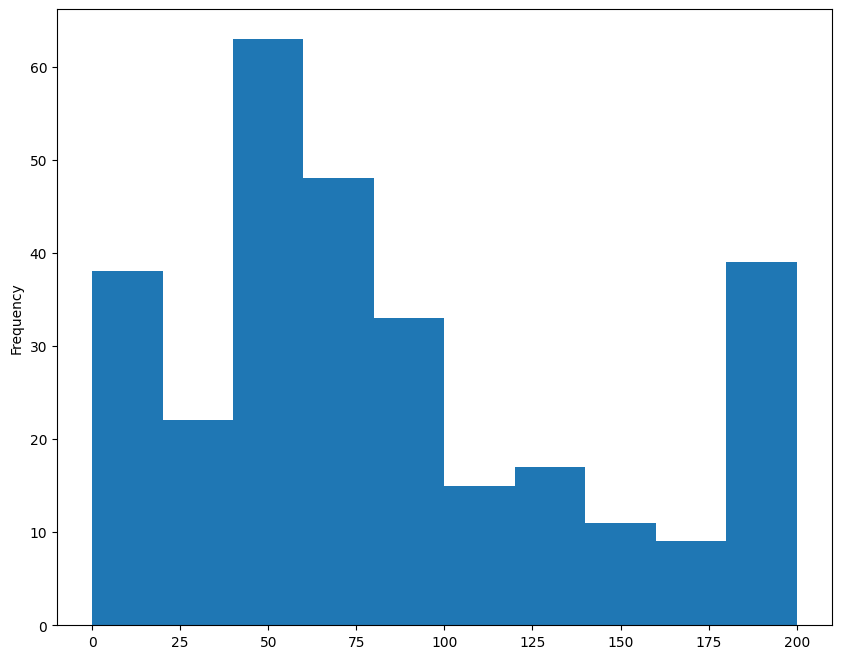

In [64]:
# sold_df[sold_df.DSO.fillna(0) != 0].shape[0]
# sold_df.DSO.fillna(0).value_counts()
sold_df[sold_df.DSO.notnull()].DSO.clip(0, 200).plot(kind='hist', figsize=(10, 8))

In [ ]:
# https://www.zillow.com/homedetails/33-Sleeper-St-APT-102-Boston-MA-02210/59172161_zpid/  # bad listing?
# https://www.zillow.com/homedetails/33-Sleeper-St-APT-102-Boston-MA-02210/2054666742_zpid/ # Actually looks legit #316 days
# https://www.zillow.com/homedetails/33-Sleeper-St-APT-102-Boston-MA-02210/59152541_zpid/ # Legit, but comercial listing?
# Keep anything where DSO < 365, more than that is strange stuff
sold_df[sold_df.DSO > 300][['ListingDate', 'dateSold', 'zpid', 'DSO']].sort_values('DSO', ascending=False)

,ListingDate,dateSold,zpid,DSO
131,2014-08-12,2024-08-26,59147619,3667.0
240,2014-06-05,2024-04-22,2106650995,3609.0
142,2018-01-24,2024-08-22,59152673,2402.0
257,2019-02-20,2024-03-24,87793221,1859.0
167,2020-03-12,2024-06-26,59211700,1567.0
213,2020-01-23,2024-05-01,295324919,1560.0
137,2020-07-23,2024-08-23,59172161,1492.0
93,2020-10-19,2024-10-22,71333503,1464.0
323,2020-07-18,2023-10-19,81853820,1188.0
49,2021-09-30,2024-12-17,81856736,1174.0


In [ ]:
# https://www.zillow.com/homedetails/33-Sleeper-St-APT-102-Boston-MA-02210/59150045_zpid/
sold_df[sold_df.DSO < 0][['zpid', 'ListingDate', 'dateSold', 'DSO']]

,zpid,ListingDate,dateSold,DSO
10,59150045,2025-02-06,2025-01-15,-22.0
11,318227332,2025-01-28,2025-01-15,-13.0
13,339518128,2025-01-16,2025-01-13,-3.0
50,59148883,2025-02-21,2024-12-13,-70.0
60,239893137,2025-08-21,2024-12-09,-255.0
66,59150964,2025-01-21,2024-12-04,-48.0
82,339516948,2025-02-03,2024-11-01,-94.0
88,87793564,2024-11-25,2024-10-30,-26.0
108,59148961,2025-05-25,2024-10-15,-222.0
140,2102654168,2024-10-26,2024-08-23,-64.0


In [ ]:
# sold_df.groupby('ListingDate').size().sort_values()
# (sold_df.dateSold - sold_df.ListingDate).sort_values()
# sold_df[sold_df.ListingDate.isnull()]
sold_df['DSO'] = (sold_df.ListingDate - sold_df.dateSold).dt.days
sold_df[sold_df.DSO == 0].daysOnZillow.value_counts()
sold_df[sold_df.DSO != 0].DSO.describe()

count     28.000000
mean     126.178571
std      117.097634
min        3.000000
25%       43.000000
50%       76.500000
75%      208.000000
max      445.000000
Name: DSO, dtype: float64

In [ ]:

# sorted(sold_df.columns)
# (sold_df.dateSold - sold_df.ListingDate).sort_values()
sold_df['DSO'] = sold_df.ListingDate - sold_df.dateSold
# (sold_df.ListingDate - sold_df.dateSold).mean().days
# sold_df[sold_df.DSO == pd.Timedelta(10, unit='day')]

# sold_df[sold_df.DSO.dt.days >= 9].sort_values('DSO')
# sold_df.DSO.dt.days.hist()
# sold_df[sold_df.DSO.dt.days != 0].DSO.dt.days.sort_values()

######
# sold_df.ListingDate.value_counts().sort_values(ascending=False)
# sold_df.dateSold.value_counts()
zpid = sold_df[sold_df.dateSold.dt.date == date(2025, 2, 6)].zpid.values[0]

url = f"http://www.zillow.com/homedetails/{zpid}_zpid/"
print(zpid)
print(url)

339517505
http://www.zillow.com/homedetails/339517505_zpid/


In [ ]:
sold_df.dateSold = pd.to_datetime(sold_df.dateSold, unit='ms').dt.date
sold_df.datePriceChanged = pd.to_datetime(sold_df.datePriceChanged, unit='ms').dt.date
sold_df.head()

,bathrooms,bedrooms,city,country,currency,dateSold,daysOnZillow,homeStatus,homeStatusForHDP,homeType,...,zestimate,zipcode,zpid,lotAreaUnit,lotAreaValue,datePriceChanged,priceChange,priceReduction,isRentalWithBasePrice,videoCount
0,2.0,2.0,Boston,USA,USD,2025-02-06,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,877100.0,02127,339517505,None,NaN,NaT,NaN,None,None,NaN
1,3.0,6.0,Boston,USA,USD,2025-02-05,-1,RECENTLY_SOLD,RECENTLY_SOLD,MULTI_FAMILY,...,2086500.0,02127,440709342,sqft,3306.0,NaT,NaN,None,None,NaN
2,4.0,4.0,South Boston,USA,USD,2025-01-31,-1,RECENTLY_SOLD,RECENTLY_SOLD,SINGLE_FAMILY,...,1801400.0,02127,59152217,sqft,1350.0,NaT,NaN,None,None,NaN
3,2.0,2.0,South Boston,USA,USD,2025-01-31,-1,RECENTLY_SOLD,RECENTLY_SOLD,CONDO,...,685500.0,02127,63530960,None,NaN,2024-12-27,-20000.0,"$20,000 (Dec 27)",None,NaN
4,4.0,4.0,South Boston,USA,USD,2025-01-29,-1,RECENTLY_SOLD,RECENTLY_SOLD,SINGLE_FAMILY,...,2101600.0,02127,59149638,sqft,1587.0,NaT,NaN,None,None,NaN


In [ ]:
my_api_key = '37cfe89bbemsh032c6d973ab17e0p164cfbjsn980520001899'
headers = {'X-RapidAPI-Key': my_api_key, 'X-RapidAPI-Host': 'zillow56.p.rapidapi.com'}
url = 'https://zillow56.p.rapidapi.com/propertyV2'
querystring = {'zpid': '339517505'}
page = 1

response = requests.get(url, headers=headers, params=querystring).json()
data = response
print(data)

None


In [ ]:
print(response.get('daysOnZillow'))
print(response.get('streetAddress'))
sorted(response.keys())

4
328 W 3rd St #1


['abbreviatedAddress',
 'address',
 'annualHomeownersInsurance',
 'apartmentsForRentInZipcodeSearchUrl',
 'attributionInfo',
 'bathrooms',
 'bedrooms',
 'boroughId',
 'boroughSearchUrl',
 'brokerId',
 'brokerIdDimension',
 'brokerageName',
 'building',
 'buildingId',
 'city',
 'cityId',
 'citySearchUrl',
 'collections',
 'comingSoonOnMarketDate',
 'communityUrl',
 'contingentListingType',
 'country',
 'county',
 'countyFIPS',
 'countyId',
 'countySearchUrl',
 'currency',
 'datePostedString',
 'daysOnZillow',
 'description',
 'desktopWebHdpImageLink',
 'editPropertyHistorylink',
 'enhancedBrokerImageUrl',
 'favoriteCount',
 'featuredListingTypeDimension',
 'foreclosingBank',
 'foreclosureAmount',
 'foreclosureAuctionCity',
 'foreclosureAuctionDescription',
 'foreclosureAuctionFilingDate',
 'foreclosureAuctionLocation',
 'foreclosureAuctionTime',
 'foreclosureBalanceReportingDate',
 'foreclosureDate',
 'foreclosureDefaultDescription',
 'foreclosureDefaultFilingDate',
 'foreclosureJudicia

In [ ]:
pdf = pd.DataFrame(response.get('priceHistory'))
pdf.date = pd.to_datetime(pdf.date)
listing_date = pdf[pdf.event == 'Listed for sale'].date.max()
print(listing_date)
pdf.head()

# https://realstate.api.zenrows.com/v1/targets/zillow/properties/339517505_zpid?apikey=be044f050f7b34b0a8b9abc7883dfa003c881018

2025-01-21 00:00:00


,attributeSource,buyerAgent,date,event,postingIsRental,price,priceChangeRate,pricePerSquareFoot,sellerAgent,showCountyLink,source,time
0,"{'infoString1': '73327809', 'infoString2': 'ML...","{'name': 'Brittany Carisella', 'photo': None, ...",2025-02-06,Sold,False,882000,0.008000,978,"{'name': 'The Amy Carlisle Group', 'photo': No...",False,MLS PIN,1738800000000
1,"{'infoString1': '73327809', 'infoString2': 'ML...",None,2025-01-22,Contingent,False,875000,0.000000,970,None,False,MLS PIN,1737504000000
2,"{'infoString1': '73327809', 'infoString2': 'ML...",None,2025-01-21,Listed for sale,False,875000,-0.026696,970,None,False,MLS PIN,1737417600000
3,"{'infoString1': '73324325', 'infoString2': 'ML...",None,2025-01-11,Listing removed,False,899000,0.000000,997,None,False,MLS PIN,1736553600000
4,"{'infoString1': '73324325', 'infoString2': 'ML...",None,2025-01-08,Listed for sale,False,899000,0.000000,997,None,False,MLS PIN,1736294400000


In [ ]:
response.get('resoFacts')

{'aboveGradeFinishedArea': None,
 'accessibilityFeatures': None,
 'additionalFeeInfo': None,
 'additionalParcelsDescription': None,
 'appliances': None,
 'architecturalStyle': None,
 'associationAmenities': None,
 'associationFee': '$232 monthly',
 'associationFee2': None,
 'associationFeeIncludes': ['Water', 'Sewer', 'Insurance'],
 'associationName': None,
 'associationName2': None,
 'associationPhone': None,
 'associationPhone2': None,
 'associations': [{'feeFrequency': '$232 monthly',
   'name': None,
   'phone': None}],
 'atAGlanceFacts': [{'factLabel': 'Type', 'factValue': 'Condominium'},
  {'factLabel': 'Year Built', 'factValue': '2016'},
  {'factLabel': 'Heating', 'factValue': 'Forced Air'},
  {'factLabel': 'Cooling', 'factValue': 'Central Air'},
  {'factLabel': 'Parking', 'factValue': '1 Garage space'},
  {'factLabel': 'HOA', 'factValue': '$232 monthly'},
  {'factLabel': 'Offer Review Date', 'factValue': None}],
 'attic': None,
 'availabilityDate': None,
 'basement': 'None',
 '